In [1]:
import pandas as pd

df = pd.read_csv('C:/Users/hp/Desktop/10 Acadamy/VS code/fintech-app-review-analysis/Data/processed_reviews.csv')


In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df['sentiment_scores'] = df['review'].apply(lambda x: analyzer.polarity_scores(str(x)))

# Extract compound score
df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])

# Classify sentiment based on compound score
def sentiment_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['compound_score'].apply(sentiment_label)


In [3]:
print(df['sentiment'].value_counts())

sentiment
Positive    753
Neutral     297
Negative    140
Name: count, dtype: int64


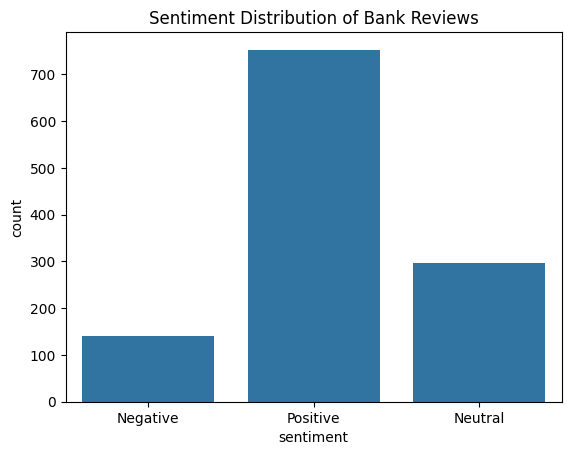

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='sentiment')
plt.title('Sentiment Distribution of Bank Reviews')
plt.show()

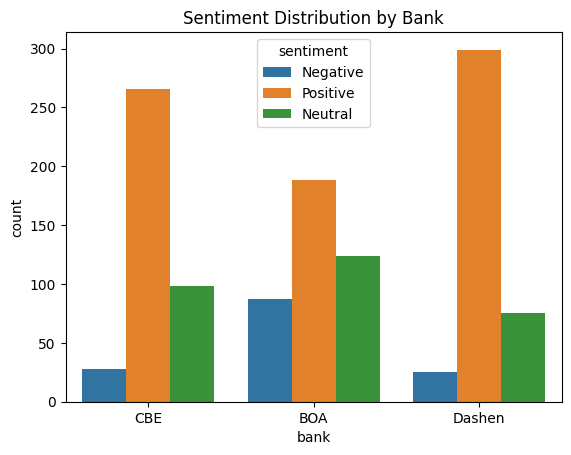

In [5]:
sns.countplot(data=df, x='bank', hue='sentiment')
plt.title('Sentiment Distribution by Bank')
plt.show()

In [6]:
df.to_csv('C:/Users/hp/Desktop/10 Acadamy/VS code/fintech-app-review-analysis/Data/sentiment_reviews.csv', index=False)